# Introduction to Data Science with Case Studies

1. **Preliminaries**
    * Revisiting Python: tools, packages, programming environment, IPython Notebook
    * Machine learning review: supervised and unsupervised learning
    * Warm-up case study: Text mining on citation data of Turkish academics
2. Case Study 1 – Crawling the Web: Sentiment Analysis with Twitter Data
    * Using an application programming interface (API)
    * Inspecting the JSON format
    * Simple sentiment analysis with word counts
    * Plotting the word cloud
3. Case Study 2 - Unsupervised Learning: Customer Segmentation in Retail Industry
    * Main approaches in clustering
    * Features, correlations, numerical and categorical data
    * Model selection
    * Clustering and plotting
    * Discussion
4. Case Study 3 - Supervised Learning: Personal Credit Scoring
    * Main approaches in supervised learning
    * Features, correlations, normalization and feature reduction
    * Model selection and plotting
    * Discussion
5. Case Study 4 - Dynamic Plots: Visualizing Piketty’s Capital
    * Plot types, automatic coloring, subplots
    * Designing interactive elements
    * Publishing dynamic plots on the web
6. Case Study 5 - Fraud Detection via Graph Analysis: Enron Email Dataset
    * Graph construction
    * Incidence matrix
    * Centrality, degrees,
    * Graph visualization
7. Case Study 6 – Character Recognition from Images
    * Main approaches in image processing
    * Review of classification methods
    * Model selection and support vector machines
    * Discussion

# Requirements and Setup

In this course we are going to use Python and several popular packages. Some of these packages are:

1. **Scikit-learn**: A popular machine learning library with an easy-to-use API (http://scikit-learn.org/stable/). 
2. **Pandas**: A library for data analysis and data structures (http://pandas.pydata.org/). 
3. **NumPy**: A library for scientific computing (http://www.numpy.org/).
4. **Scikit-image**: An image processing library (http://scikit-image.org/).
5. **matplotlib**: A library for plotting (http://matplotlib.org/).
6. **Seaborn**: A library for statistical data visualization based on matplotlib. It allows for more pleasing plots (https://web.stanford.edu/~mwaskom/software/seaborn/).
7. **Bokeh**: A library for interactive plotting (http://bokeh.pydata.org/).
8. **Networkx**: A library for graph analysis and visualization (https://networkx.github.io/).
9. **Nltk**: Natural Language Toolkit library is ideal for text analytics (http://www.nltk.org/).

It is possible to obtain these packages (and more) by installing Anaconda (https://www.continuum.io/).

Furthermore, we use Jupyter Notebook to document the course content, which also comes with Anaconda. For example notebooks you can visit http://nbviewer.jupyter.org/.

An introduction to Jupyter Notebook is given in http://nbviewer.jupyter.org/github/ipython/ipython/blob/4.0.x/examples/Notebook/Notebook%20Basics.ipynb

In [1]:
# Package for scientific computation
import numpy as np

# This allows us to visualize plots in the notebook and not as a separate window.
%matplotlib inline
#Package for plotting
import matplotlib.pyplot as plt
plt.style.use('classic')

#In order to generate artificial clustering and classification datasets
from sklearn.datasets import make_blobs, make_classification

#vKmeans algorithm for clustering
from sklearn.cluster import KMeans

#vClassification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# This is used in order to divide dataset into training and testing datasets
from sklearn.model_selection import train_test_split

# This is used in order to evaluate the results of a classifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score

# Unsupervised Learning

In unsupervised learning, the objective is to discover hidden patterns and structures from unlabeled data. It means that we do not know whether an observation belongs to a certain class, we also do not know the existence of classes. We try to separate observations into groups such that observations in the same group are more similar to each other than observations in other groups. 

In the example below, we create an artificial dataset using 3 clusters. Let us see the effects of using various numbers as the number of clusters.

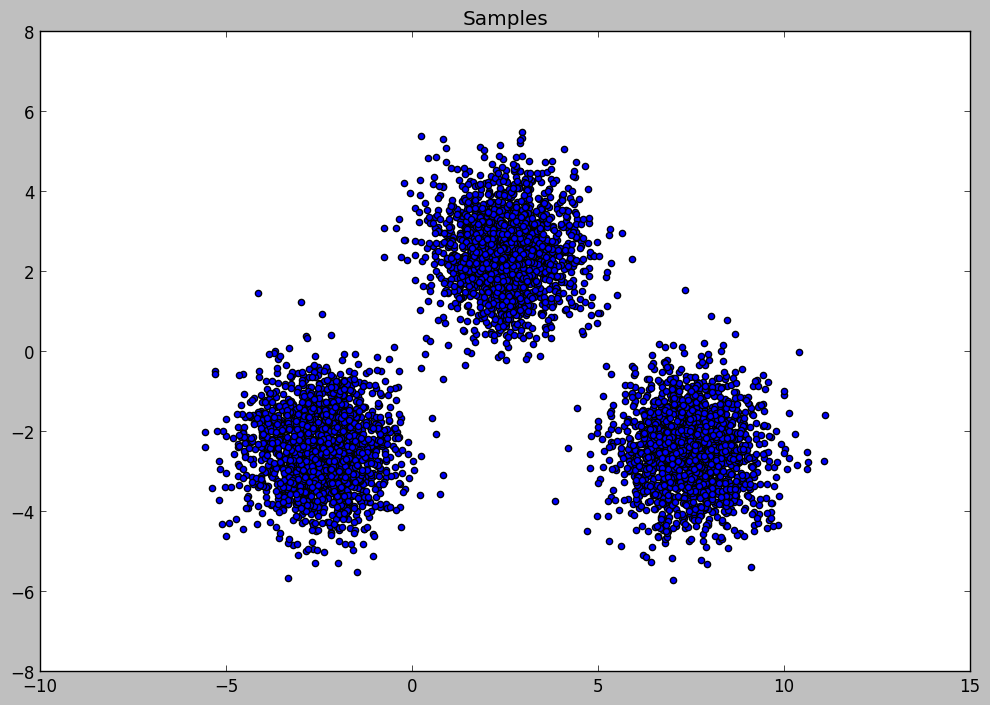

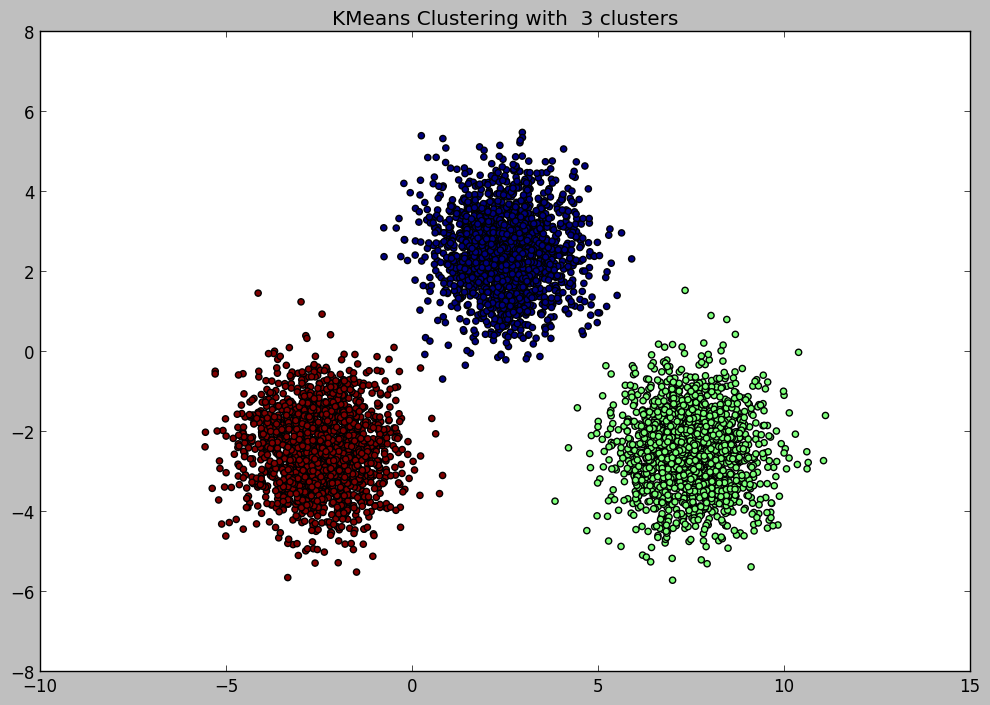

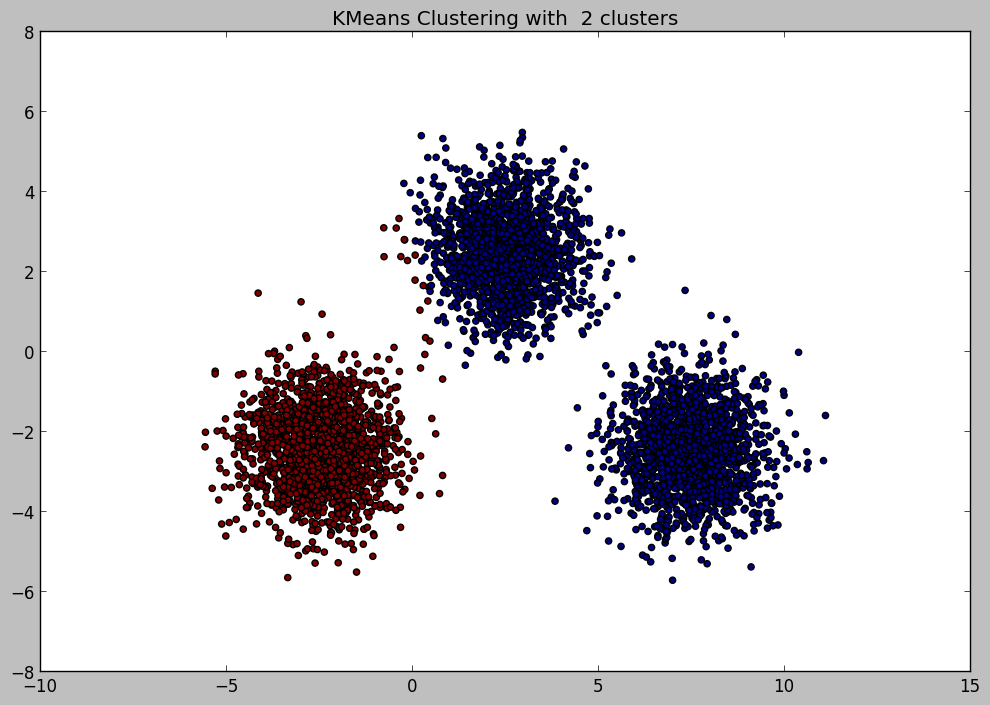

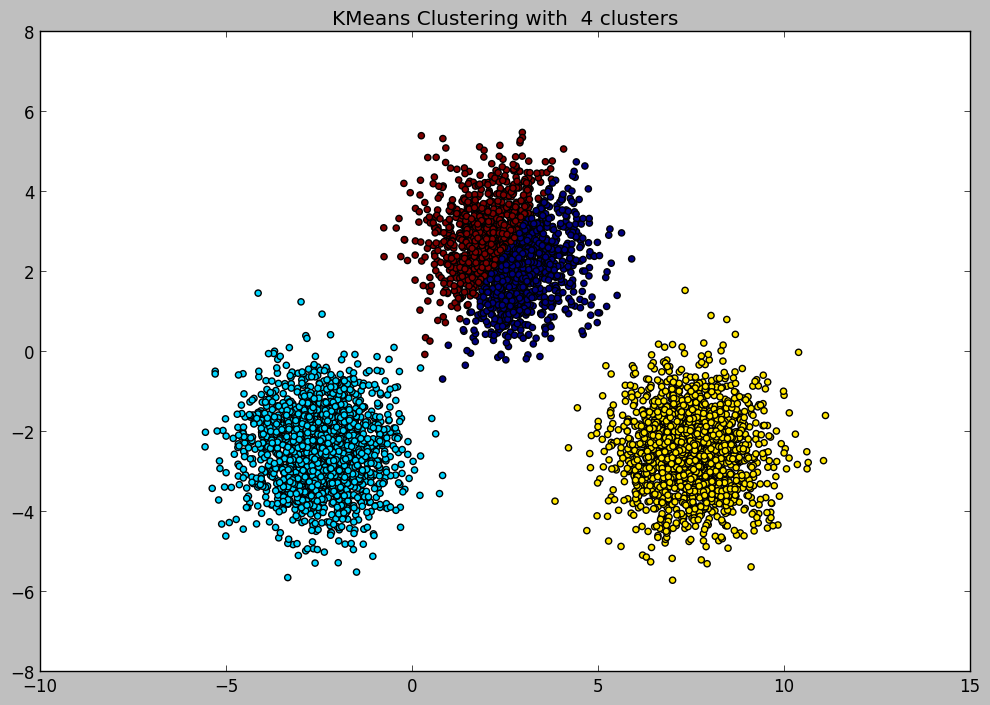

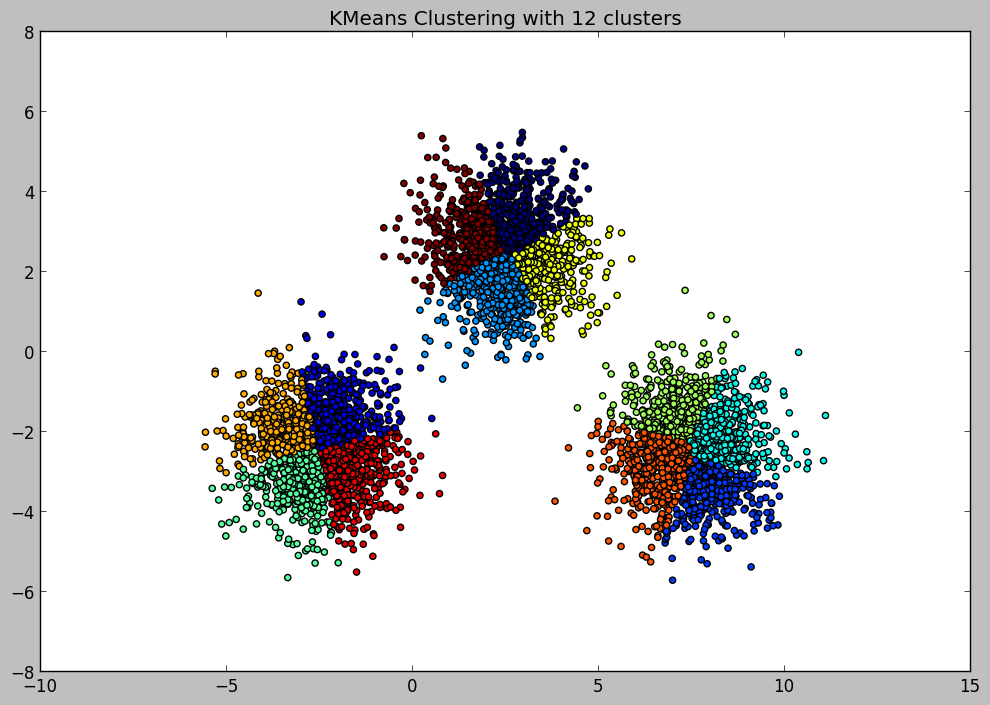

In [2]:
# We create a data set using 5000 observations. The dataset has 3 clusters, for which we provide the centers.
# We use make_blobs in order to create the artificial dataset.
n_samples = 5000
centers = [(-2.5, -2.5), (2.5, 2.5), (7.5, -2.5)]
X,y = make_blobs(
    
    n_samples=n_samples, n_features=2, cluster_std=1.0, centers=centers, random_state=1)

plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1])
plt.title("Samples")
plt.show()
    
# We try various cluster numbers. Dataset contains 3 clusters by construction
for numberClusters in [3,2,4,12]:
    # We create a k-Means model and train it using dataset we just created.
    # We run the algorithm using 10 different initialization in order to obtain better results.
    kmeans = KMeans(n_clusters=numberClusters, n_init=10)
    # This is the labels that we obtain with KMeans algorithm.
    # We also could have used the following lines
    """
    kmeans.fit(X)
    cluster_labels = kmeans.predict(X)
    """
    cluster_labels= kmeans.fit_predict(X)
    # We plot the dataset (as a scatter plot) and each observation is colored by its cluster number.
    plt.figure(figsize=(12,8))
    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels)
    plt.title("KMeans Clustering with %2i clusters" % numberClusters)
    plt.show()

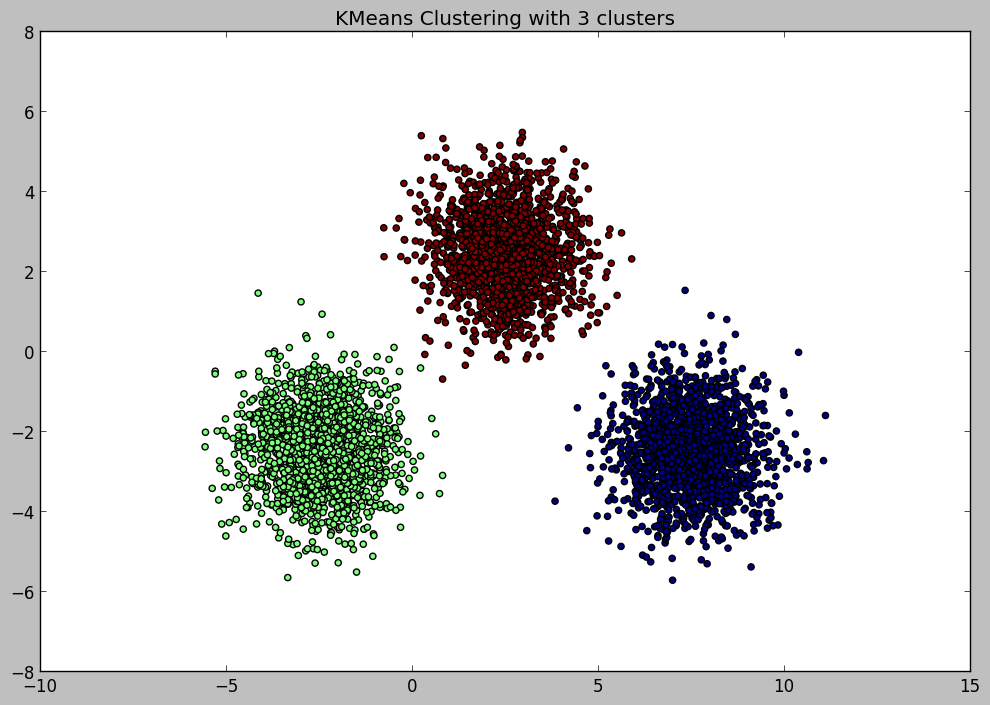

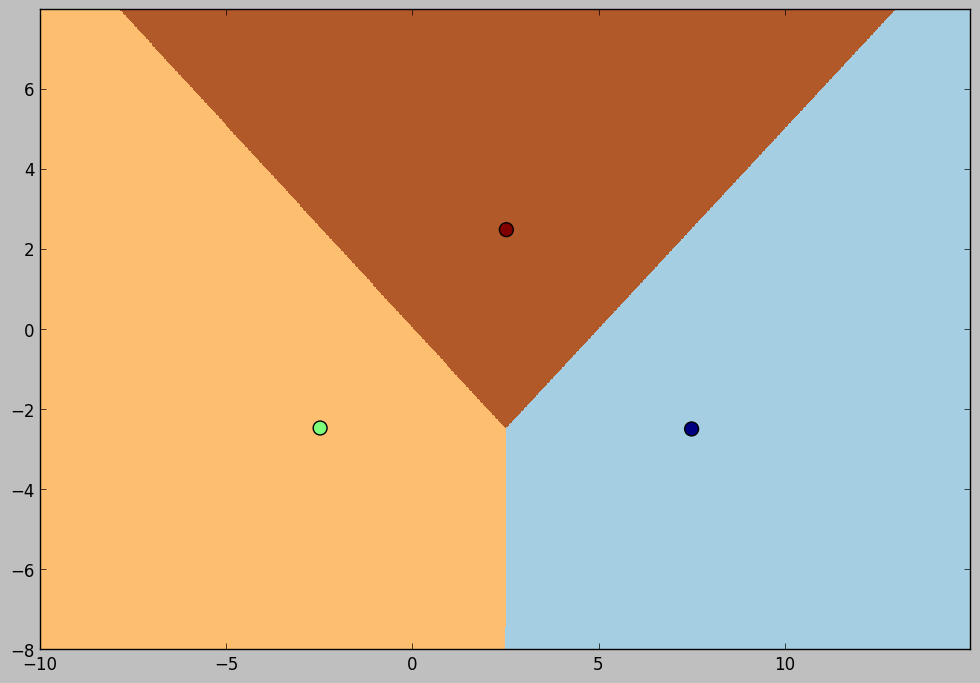

In [3]:
# We draw decision boundaries for clustering using 3 clusters. It allows us to see decision boundaries for clusters.
# We train clustering algorithm and obtain labels for clusters.
# We reinitialize the clustering algorithm using 3 clusters.
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X)
labels_3 = kmeans.predict(X)

plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=labels_3)
plt.title("KMeans Clustering with 3 clusters")
plt.show()

"""
In order to see decision boundaries we are going to create a meshgrid. 
x values are between -10 and 15. y values are between -8 and 8.

"""
#Step size of meshgrid
h = .02
xx, yy = np.meshgrid(np.arange(-10, 15, h), np.arange(-8, 8, h))

# What do we use here? Do we use predict or do we fit first?
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
# Use scatter for cluster centers and imshow for the whole area
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,8))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c=kmeans.predict(kmeans.cluster_centers_), s=100)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')


## Prediction

After fitting the model, we can predict the cluster labels of new customers. We create three new observations and find ther labels.

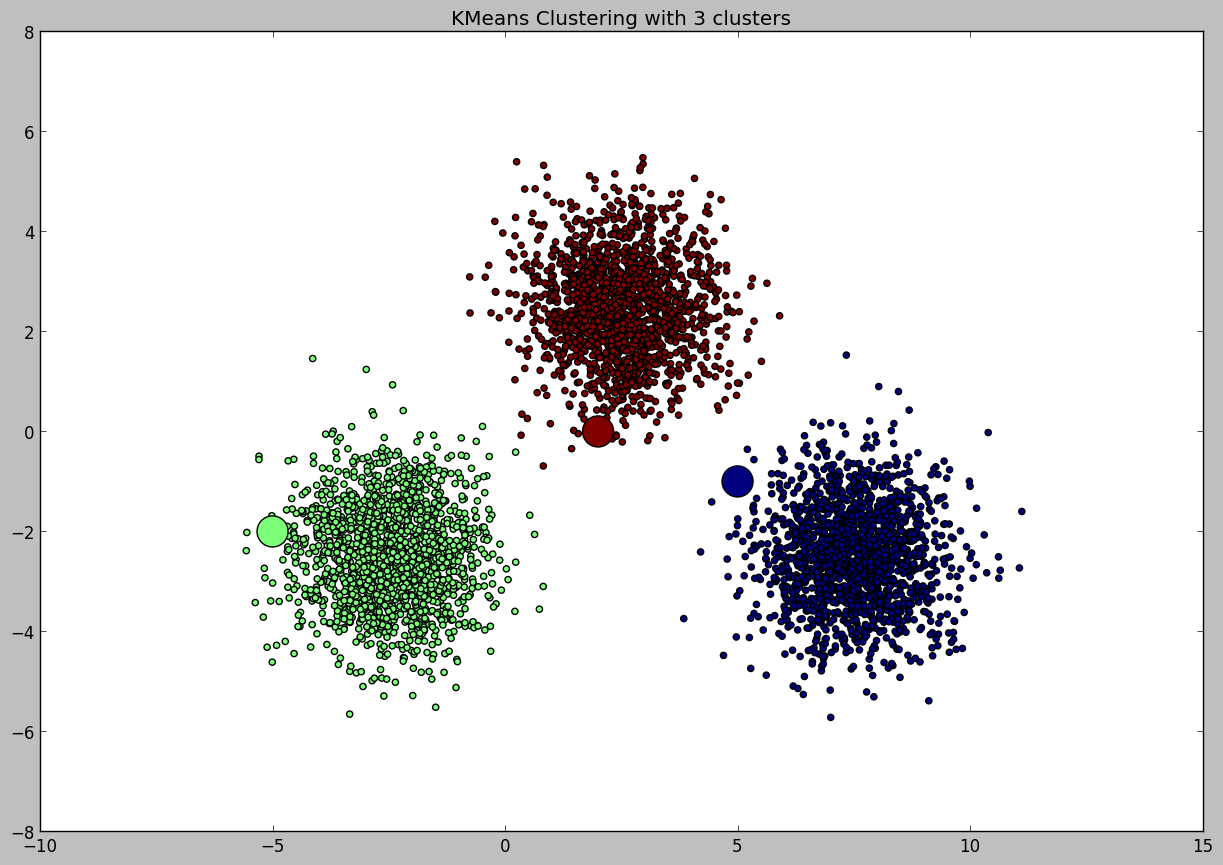

In [4]:
# We create three new observations.
x_new = np.array([[-5,-2],[2,0],[5,-1]])

plt.figure(figsize=(15,10))
# We plot the existing dataset with their clusters
plt.scatter(X[:, 0], X[:, 1], c=labels_3)
# We plot the new observations with their clusters
plt.scatter(x_new[:,0], x_new[:,1], c=kmeans.predict(x_new), s=500)
plt.title("KMeans Clustering with 3 clusters")
plt.show()


# Supervised Learning

In supervised learning, we are given observations with desired output (labels). We want to create ***a set of rules*** that can help us identify observations with different labels so that new observations are correctly guessed. Example of such labels can be:
 * Credit risk status: Bad/Good (Bad/At risk/Minimum Risk/Good)
 * Customer churn status: Churn/Loyal
 * Letters and digits for optical character recognition
 * Store sales

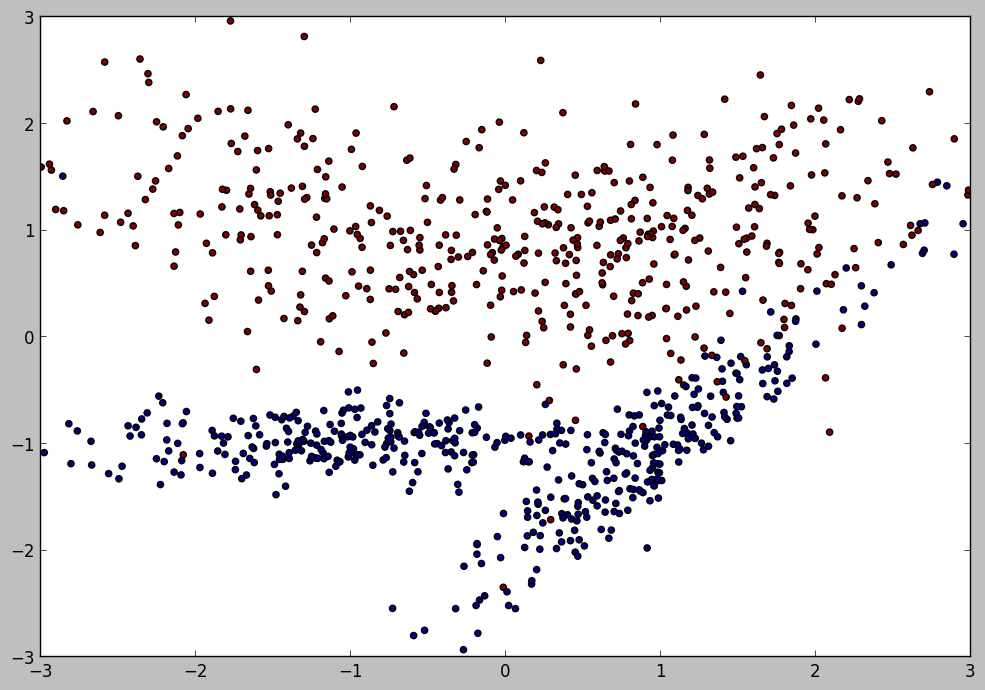

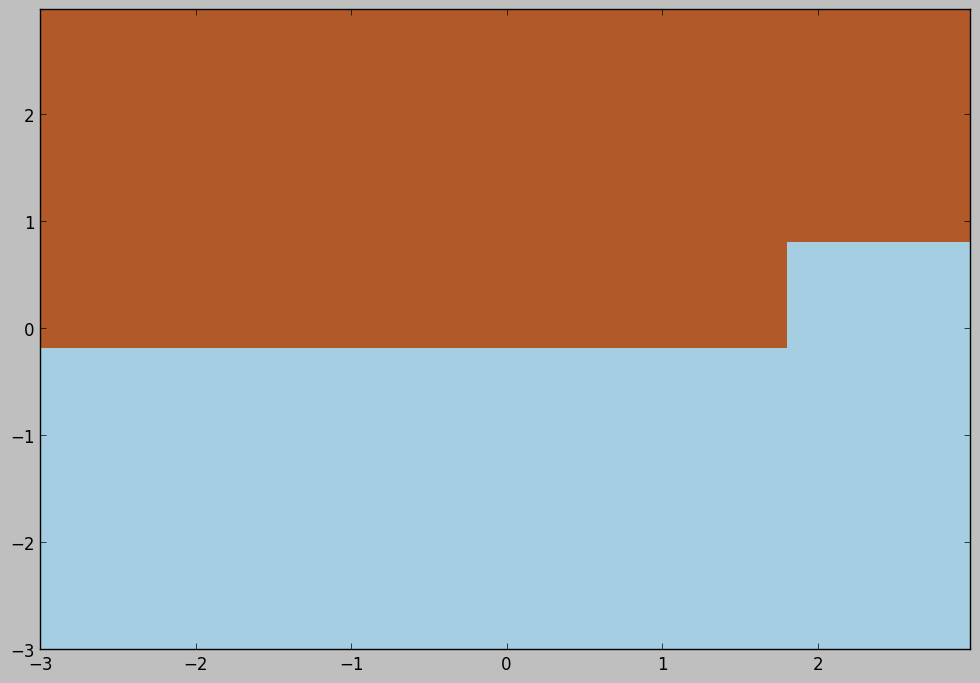

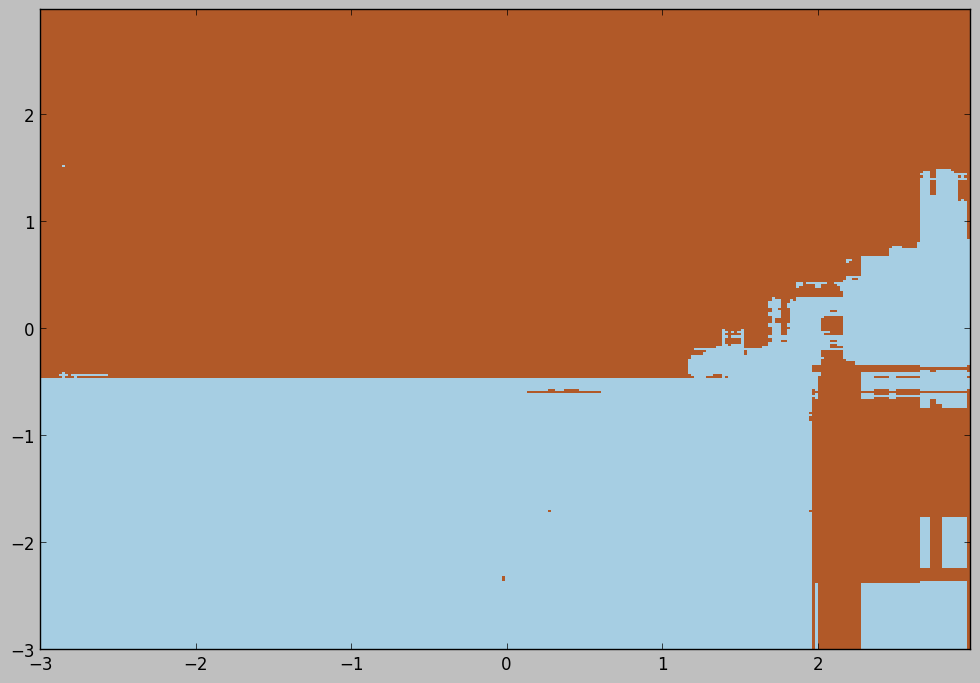

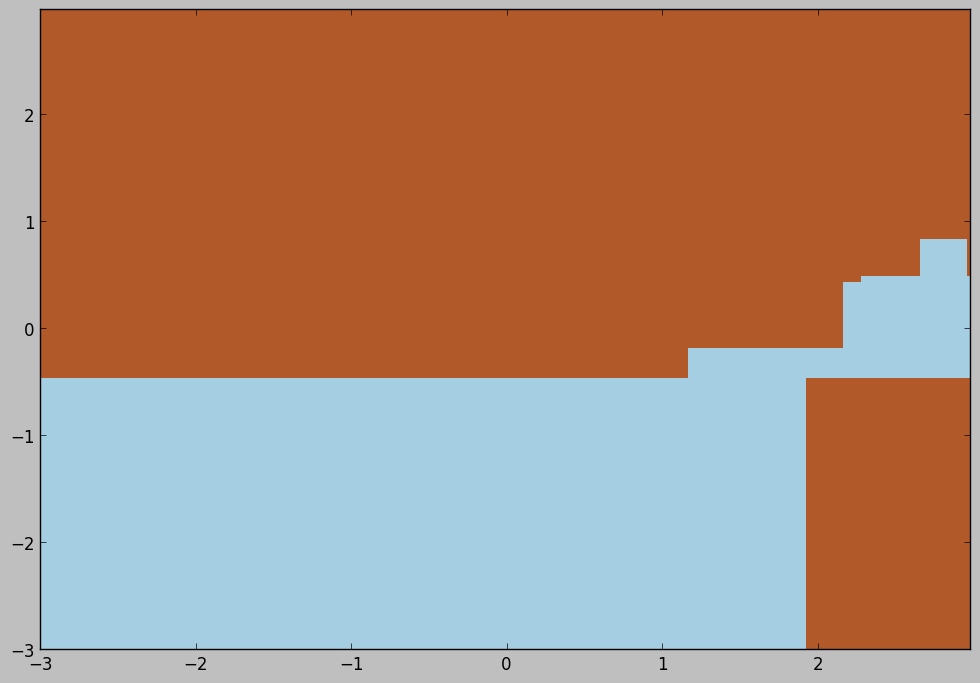

In [5]:
# For supervised learning, we create an artificial dataset using 2 classes
n_samples = 1000
X,y = make_classification(n_samples= n_samples, n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=2, random_state=0)

#Let us plot the dataset with labels as colors
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.xlim((-3,3))
plt.ylim((-3,3))
plt.show()

#Step size of meshgrid is required to draw decision boundaries
h = .02
xx, yy = np.meshgrid(np.arange(-3,3, h), np.arange(-3,3, h))

#We try different classifiers, decision tree, random forest, and gradient boosting.
#First we start by using decision trees
clf_dt = DecisionTreeClassifier(min_samples_leaf=20)
clf_dt.fit(X,y)

Z = clf_dt.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
#Use imshow to plot decision boundaries
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,8))
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.show()

# Do the same for Random Forest
clf_rf = RandomForestClassifier(n_estimators = 100)
clf_rf.fit(X,y)

Z = clf_rf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,8))
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.show()

#Do the same for Gradient Boosting
clf_gb = GradientBoostingClassifier(n_estimators = 10)
clf_gb.fit(X,y)

Z = clf_gb.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,8))

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.show()


## Prediction

After training the model, we can predict classes of new observations (that are never seen before).

It is also possible (and very useful in some instances) to also predict probability of an observation to belong to a class. 

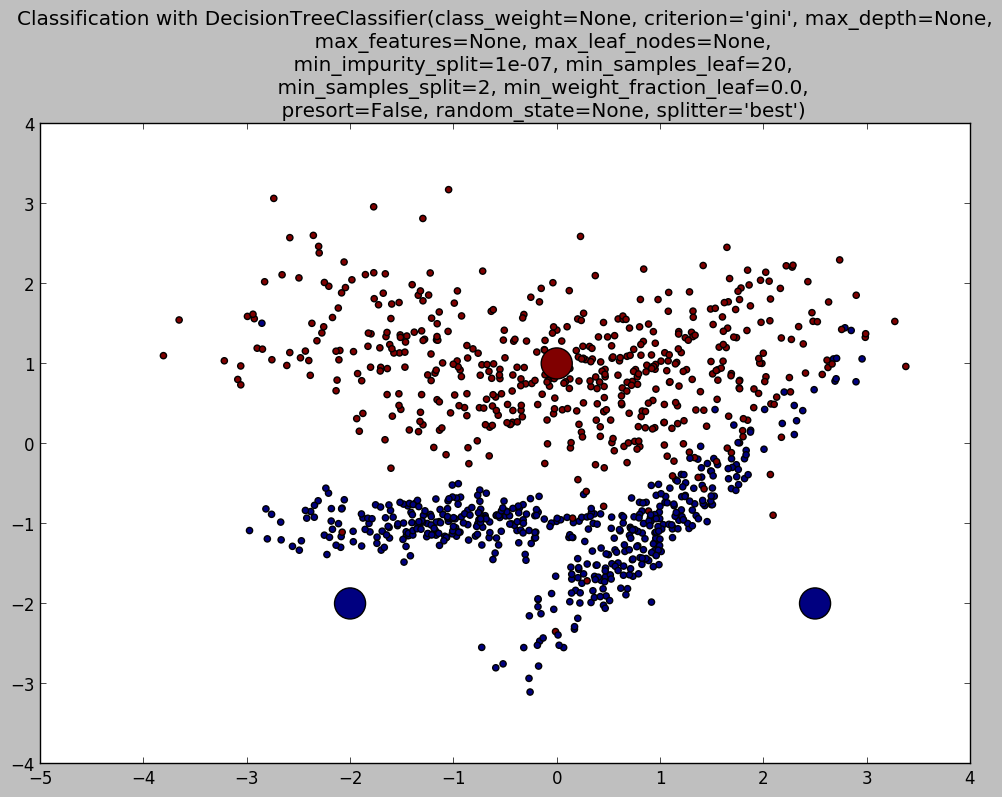

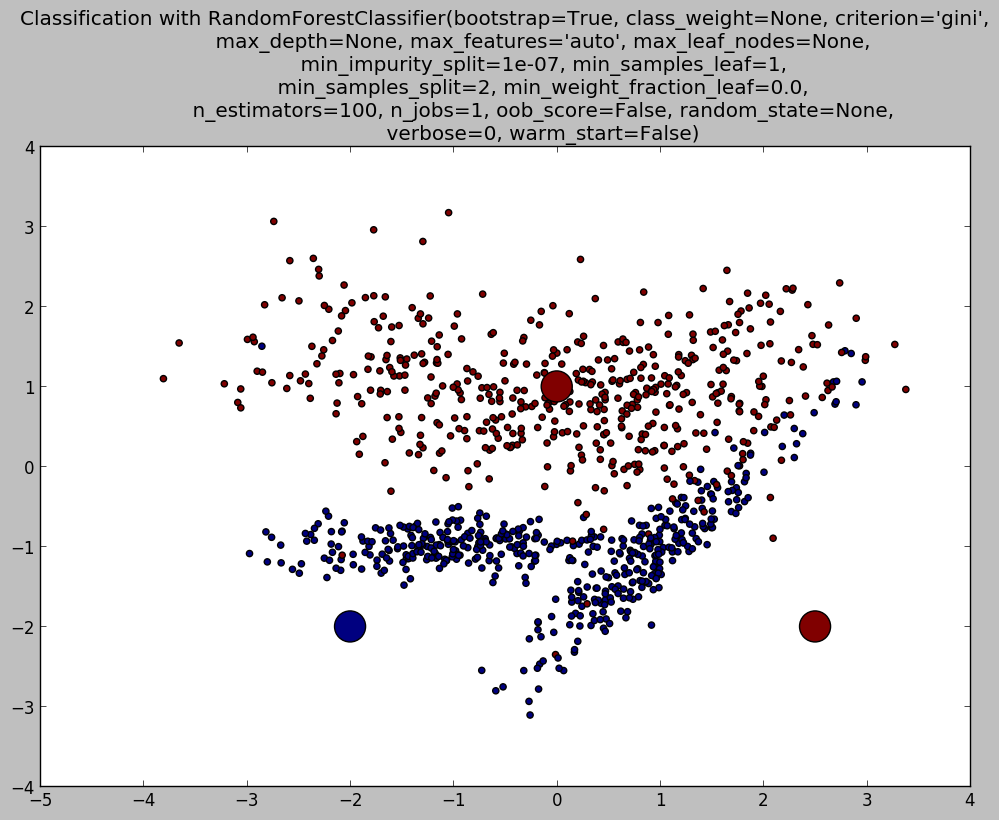

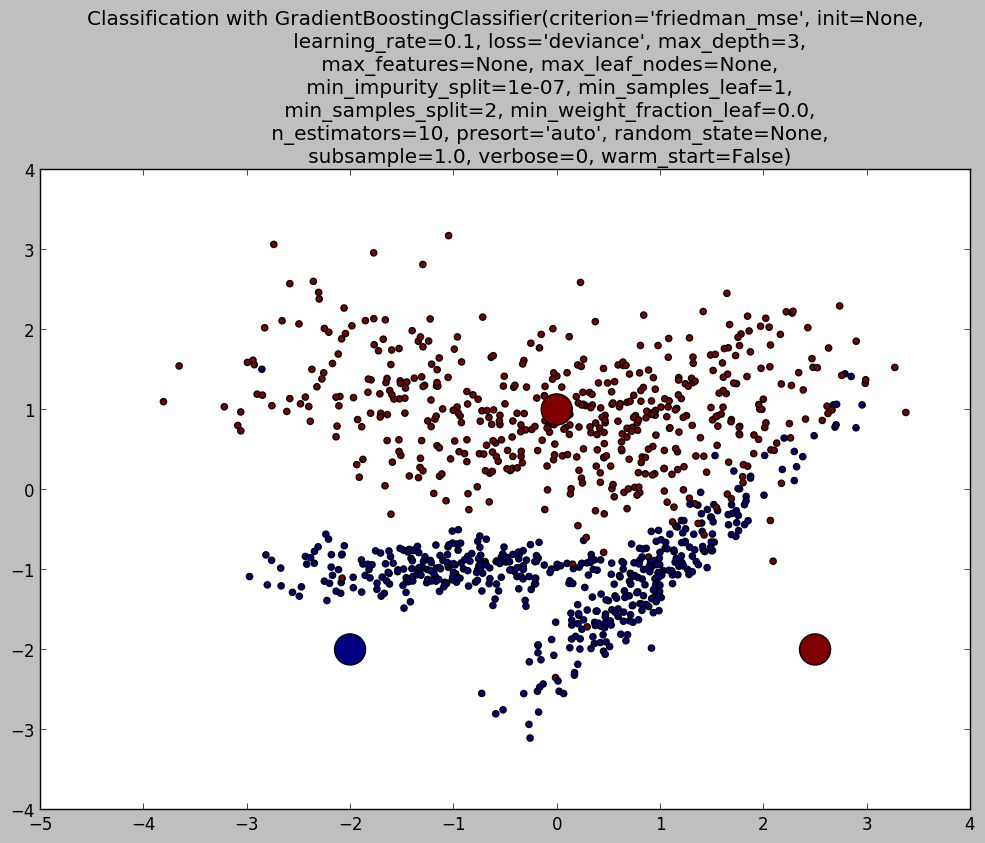

Decision Tree
Sample  0 probability of class 0 with probability 1.00, class 1 with probability 0.00
Sample  1 probability of class 0 with probability 0.00, class 1 with probability 1.00
Sample  2 probability of class 0 with probability 0.93, class 1 with probability 0.07
Random Forest


C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Anaconda2\lib\site-packages\

Sample  0 probability of class 0 with probability 0.94, class 1 with probability 0.06
Sample  1 probability of class 0 with probability 0.00, class 1 with probability 1.00


C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Sample  2 probability of class 0 with probability 0.47, class 1 with probability 0.53
Gradient Boosting
Sample  0 probability of class 0 with probability 0.81, class 1 with probability 0.19
Sample  1 probability of class 0 with probability 0.18, class 1 with probability 0.82
Sample  2 probability of class 0 with probability 0.18, class 1 with probability 0.82


C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Anaconda2\lib\site-packages\

In [6]:
#We create 3 new observations
x_new = np.array([[-2,-2],[0,1],[2.5,-2]])

#Can we do the prediction using 3 trained models in a for loop?
for model in [clf_dt, clf_rf, clf_gb]:
    plt.figure(figsize=(12,8))
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.scatter(x_new[:,0], x_new[:,1], c=model.predict(x_new), s=500)
    plt.title("Classification with %10s" % model)
    plt.show()

# We display prediction probabilities of belonging to a class
print('Decision Tree')
for i in range(len(x_new)):
    print('Sample %2i probability of class 0 with probability %4.2f, class 1 with probability %4.2f' % 
          (i,clf_dt.predict_proba(x_new[i,:])[0][0],clf_dt.predict_proba(x_new[i,:])[0][1]))

# We display prediction probabilities of belonging to a class
print('Random Forest')
for i in range(len(x_new)):
    print('Sample %2i probability of class 0 with probability %4.2f, class 1 with probability %4.2f' % 
          (i,clf_rf.predict_proba(x_new[i,:])[0][0],clf_rf.predict_proba(x_new[i,:])[0][1]))

# We display prediction probabilities of belonging to a class
print('Gradient Boosting')
for i in range(len(x_new)):
    print('Sample %2i probability of class 0 with probability %4.2f, class 1 with probability %4.2f' % 
          (i,clf_gb.predict_proba(x_new[i,:])[0][0],clf_gb.predict_proba(x_new[i,:])[0][1]))
    

## Evaluation

Evaluation techniques of classification models depend on the application area. Two of the most common techniques are:
1. Accuracy and Confusion Matrix
2. Area under curve


### Accuracy and Confusion Matrix

In a classification problem, confusion matrix and accuracy are often used in order to evaluate model performance. Each cell of the confusion matrix represents a combination of true class and predicted class.

|        |       |   Prediction   |   Prediction   |
|:------:|:-----:|:--------------:|:--------------:|
|        |       |      True      |      False     |
| Status |  True |  True positive | False negative |
| Status | False | False positive |  True negative |

In a churn prediction problem (with two classes as churn and loyal), we have the following confusion matrix

|        |       |       Prediction              |       Prediction                 |
|:------:|:-----:|:-----------------------------:|:--------------------------------:|
|        |       |         Churn                 |         Loyal                    |
| Status | Churn | Successful prediction, action |    Missed customer               |
| Status | Loyal |    Unnecessary cost of action | Successful prediction, no action |


Accuracy measures the percentage of correctly classified instances:

$ accuracy = \frac{\mbox{true positive + true negative}}{\mbox{all}}$

In some areas, such as health sciences, accuracy is not enough to determine the success of a classifier. In that case, you do not want to misdiagnose a patient with a disease. 

### Area Under Receiver Operating Characteristic Curve
We have seen in the previous instances that some classifiers also provide probabilities for classification results. Both accuracy and confusion matrix depend on the thresholds that we select in order to convert a probability into a class label. we can choose to label an observation with a certain class if the probability calculated is above a threshold value, $\tau$. **Area under curve** is an evaluation method that is not dependent on the threshold that we select. 

In [7]:
#We produce 10000 samples and divide it 2/3 for training and 1/3 for testing
n_samples = 10000
centers = [(-2.5, -2.5), (2.5, 2.5), (7.5, -2.5)]
X,y = make_classification(n_samples= n_samples, n_features=20, n_redundant=10, n_informative=10,n_clusters_per_class=2, random_state=0)

#Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.67)

#Use Random Forest and Decision Tree for classification. 
#This time we are going to need labels (accuracy) and probabilities (auc)
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train,y_train)
y_pred_rf = clf_rf.predict(X_test)
y_pred_prob_rf = clf_rf.predict_proba(X_test)

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train,y_train)
y_pred_dt = clf_dt.predict(X_test)
y_pred_prob_dt = clf_dt.predict_proba(X_test)

#Pring metrics (confusion matrix, accuracy, area under curve)
print('Metrics for Random Forest Classifier')
print('Accuracy score')
print(accuracy_score(y_test, y_pred_rf))

print('Confusion matrix')
print(confusion_matrix(y_test, y_pred_rf))

print('Area under curve')
print(roc_auc_score(y_test, y_pred_prob_rf[:,1]))


print('Metrics for Decision Tree Classifier')
print('Accuracy score')
print(accuracy_score(y_test, y_pred_dt))

print('Confusion matrix')
print(confusion_matrix(y_test, y_pred_dt))

print('Area under curve')
print(roc_auc_score(y_test, y_pred_prob_dt[:,1]))


Metrics for Random Forest Classifier
Accuracy score
0.94
Confusion matrix
[[1605   74]
 [ 124 1497]]
Area under curve
0.982089784209
Metrics for Decision Tree Classifier
Accuracy score
0.88
Confusion matrix
[[1470  209]
 [ 187 1434]]
Area under curve
0.880080127599


To understand Area Under Curve, we must use threshold values. In (binary) classification, most of the classifiers that we use return probability of an observation belonging to a class. So if the probability of an observation belonging to a class is more than a threshold value (usually 0.5), we assign the observation to this class. We then see how accurate we are.

In Area Under Curve, we use all possible threshold values in order to evaluate the classifier. Each point on the graph corresponds to the performance of a certain threshold value.

[[ 696  983]
 [   4 1617]]
True positive rate 0.997532387415 True negative rate 0.414532459797
[[1097  582]
 [  10 1611]]
True positive rate 0.993830968538 True negative rate 0.653365098273
[[1327  352]
 [  25 1596]]
True positive rate 0.984577421345 True negative rate 0.790351399643
[[1469  210]
 [  49 1572]]
True positive rate 0.969771745836 True negative rate 0.874925550923
[[1551  128]
 [  77 1544]]
True positive rate 0.952498457742 True negative rate 0.923764145325
[[1605   74]
 [ 124 1497]]
True positive rate 0.92350400987 True negative rate 0.955926146516
[[1644   35]
 [ 205 1416]]
True positive rate 0.873534855028 True negative rate 0.979154258487
[[1658   21]
 [ 350 1271]]
True positive rate 0.784083898828 True negative rate 0.987492555092
[[1669   10]
 [ 614 1007]]
True positive rate 0.621221468229 True negative rate 0.994044073853


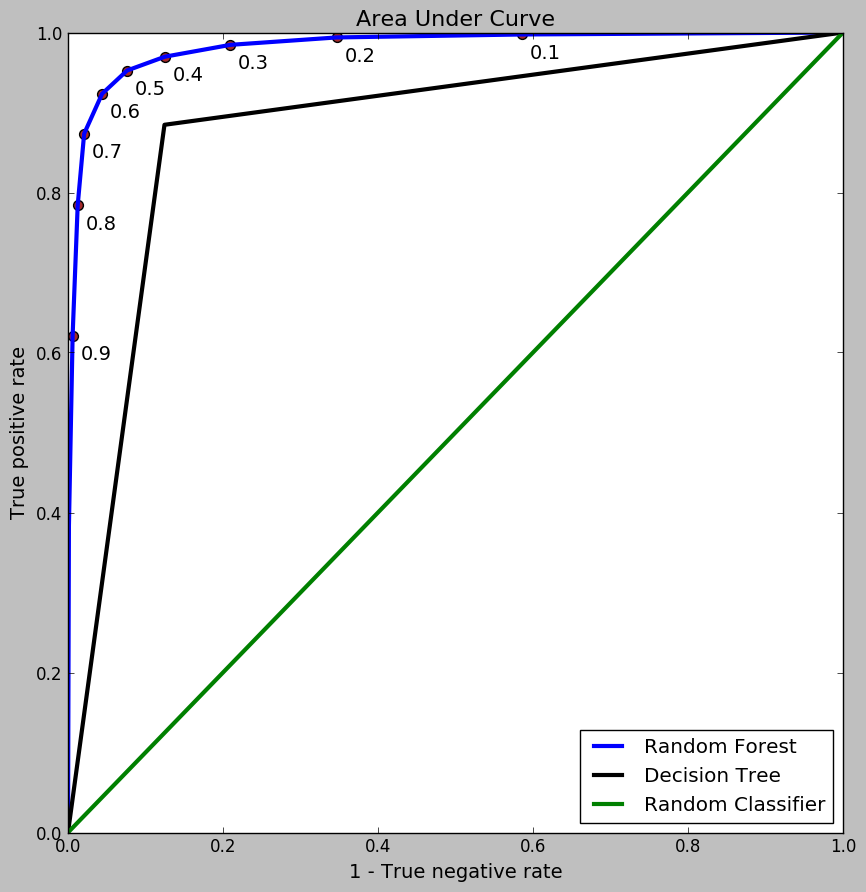

In [8]:
from __future__ import division

#Plot roc curve using roc_curve function
a_rf, b_rf, c_rf = roc_curve(y_test, y_pred_prob_rf[:,1])
a_dt, b_dt, c_dt = roc_curve(y_test, y_pred_prob_dt[:,1])

x_random = [0,0.5,1]
fig = plt.figure(figsize=(10,10))
#Plot ROC Curve
plt.plot(a_rf, b_rf, c='b', label = 'Random Forest', linewidth = 3)
plt.plot(a_dt, b_dt, c='k', label = 'Decision Tree', linewidth = 3)
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    #We calculate labels with respect to the threshold value and create confusion matrix
    y_predicted = (y_pred_prob_rf[:,1] >= i)
    confusion_mat = confusion_matrix(y_test,y_predicted)
    print(confusion_mat)
    #We calculate true positive and true negative rate
    true_positive = confusion_mat[1,1] / ( confusion_mat[1,0] +  confusion_mat[1,1])
    true_negative = confusion_mat[0,0] / ( confusion_mat[0,0] +  confusion_mat[0,1])
    print('True positive rate ' + str(true_positive) + ' True negative rate ' + str(true_negative))
    plt.scatter(1-true_negative,true_positive,c='brown',s=50)
    plt.annotate(i, (1-true_negative+ 0.01,true_positive - 0.03), fontsize = 14)

plt.plot(x_random, x_random, c='g', label = 'Random Classifier', linewidth = 3)

plt.title('Area Under Curve', fontsize = 16)
plt.ylabel('True positive rate', fontsize = 14)
plt.xlabel('1 - True negative rate', fontsize = 14)
plt.xlim((0,1))
plt.ylim((0,1))
plt.legend(loc=4)
plt.show()

# Training / Cross-Validation / Testing

In a classification problem, we observe patterns for a certain period (period of observation) and predict a future event, or we observe patterns in a labeled data set in order to correctly label future observations.
 * Will a targeted customer respond to a campaign? (Yes/No)
 * Will a customer churn? (Yes/No)
 * Will a customer pay credit installment in time? (Yes/No)
 * How much sales a store will achieve? (Continuous amount)
 * Given the picture of a character, predict what the character is? (Multiple classes, A-Z, a-z, 0-9)

We use training data in order to fit the model. Training optimizes the model to fit the training data as well as possible. If we use the model to classify new observation it will generally not fit the testing data (not seen before) as well as the training data (overfitting). Cross-validation helps predict how a model is going to fit testing data. Cross-validation is also useful when training dataset is small.

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


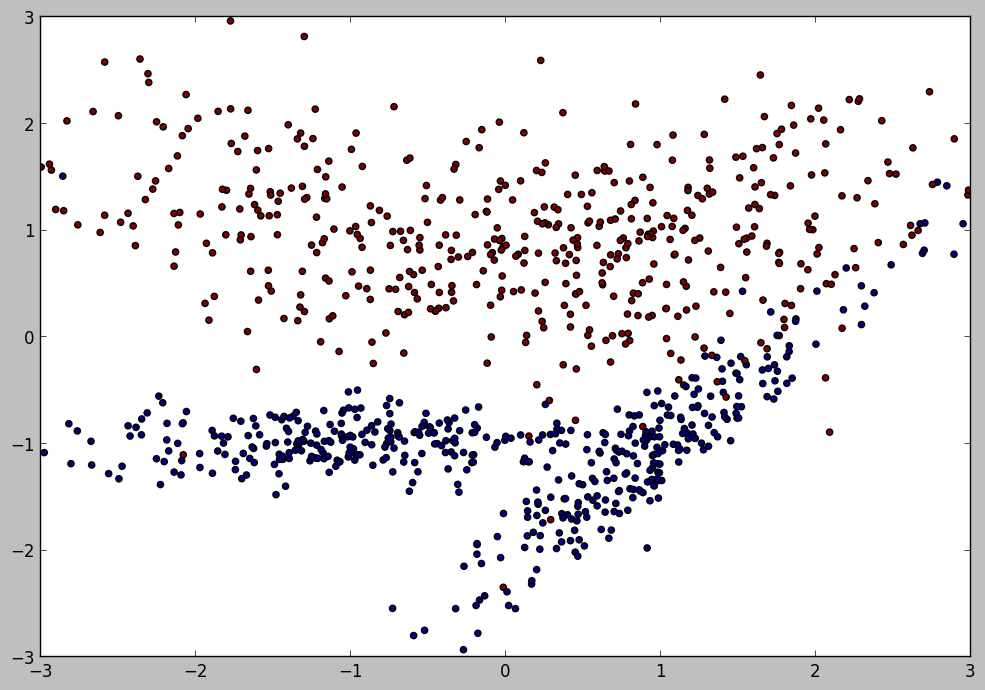

Results for Decision Tree Classifier
0.96504950495
0.945346534653
0.95504550455
0.939696969697
0.929696969697
Results for Random Forest Classifier
0.990891089109
0.989603960396
0.982898289829
0.980707070707
0.970757575758


In [9]:
from sklearn.cross_validation import StratifiedKFold

n_samples = 1000
centers = [(-2.5, -2.5), (2.5, 2.5), (7.5, -2.5)]
X,y = make_classification(n_samples= n_samples, n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=2, random_state=0)
plt.figure(figsize = (12,8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.xlim((-3,3))
plt.ylim((-3,3))
plt.show()

clf_dt = DecisionTreeClassifier()
clf_rf = RandomForestClassifier()

#Stratified k-fold is used in order to partition data with respect to labels.
#In testing and training datasets, data labels are present at the same rate.
#K-fold does not guarantee this.
skfold = StratifiedKFold(y, n_folds = 5)

print('Results for Decision Tree Classifier')
for train_index, test_index in skfold:
    #print("TRAIN:", train_index, "TEST:", test_index)
    #Classify and display AUC
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_dt.fit(X_train,y_train)
    print(roc_auc_score(y_test, clf_dt.predict_proba(X_test)[:,1]))

    
print('Results for Random Forest Classifier')
for train_index, test_index in skfold:
    #print("TRAIN:", train_index, "TEST:", test_index)
    #Classify and display AUC
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_rf.fit(X_train,y_train)
    print(roc_auc_score(y_test, clf_rf.predict_proba(X_test)[:,1]))


# Prediction Setup

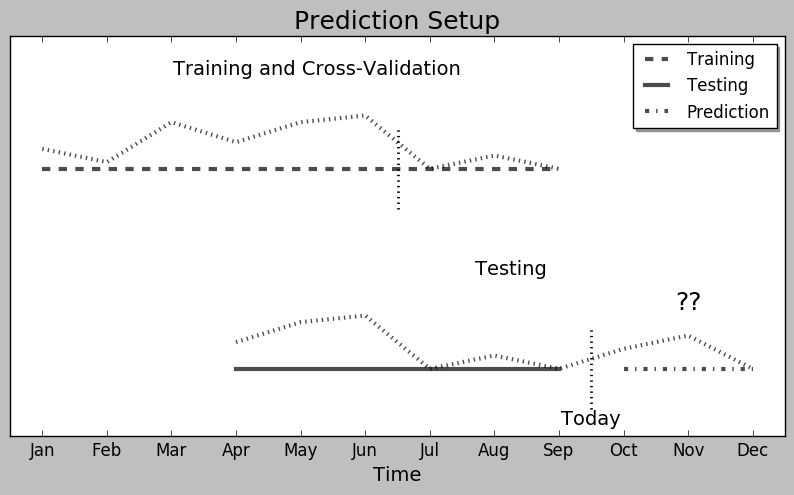

In [10]:
x=[np.nan, np.nan, np.nan, np.nan, 0, 0, 0, 0, 0, 0, np.nan, np.nan, np.nan, np.nan]
x5=[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.0, 0.0, 0.0, np.nan]
x1=[np.nan, 3, 3, 3, 3, 3, 3, 3, 3, 3, np.nan, np.nan, np.nan, np.nan]
x3=[np.nan, np.nan, np.nan, np.nan, 0.4, 0.7, 0.8, 0, 0.2, 0, 0.3, 0.5, 0, np.nan]
x4=[np.nan, 3.3, 3.1, 3.7, 3.4, 3.7, 3.8, 3, 3.2, 3, np.nan, np.nan, np.nan, np.nan]


fig = plt.figure(figsize=(10,5))
plt.plot(x1, color='k', alpha = 0.7, linewidth = 3, linestyle = 'dashed', label='Training')
plt.plot(x, color='k', alpha = 0.7, linewidth = 3,  linestyle = 'solid', label = 'Testing')
plt.plot(x3, color='k', alpha = 0.7, linewidth = 3, linestyle = 'dotted')
plt.plot(x4, color='k', alpha = 0.7, linewidth = 3, linestyle = 'dotted')
plt.plot(x5, color='k', alpha = 0.7, linewidth = 3, linestyle = 'dashdot', label = 'Prediction')

plt.xlabel('Time', fontsize=14)
plt.ylim((-1,5))
plt.xlim((0.5,12.5))
plt.annotate('Training and Cross-Validation', xy=(5.25, 4.5),fontsize=14, ha = 'center', va='center')
plt.annotate('Testing', xy=(8.25, 1.5),fontsize=14,ha = 'center', va='center')
plt.annotate('??', xy =(11,1),fontsize=18,ha = 'center', va='center')
plt.annotate('Today', xy=(9.5, -0.75),fontsize=14, ha = 'center', va='center')

plt.axvline(x=6.5, ymin=0.5666, ymax = 0.7666, linewidth=2, color='k', ls='dotted')
plt.axvline(x=9.5, ymin=0.0666, ymax = 0.2666, linewidth=2, color='k', ls='dotted')
plt.xticks(np.arange(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(loc='upper right', shadow=True, fontsize =12)
plt.xticks(fontsize=12)  
plt.yticks([])    
plt.title('Prediction Setup', fontsize = 18)
plt.show()

# DataFrame

A DataFrame is used for storing data tables. Its elements can be accessed by index (like an array), but also by name (like a database).  

We are going to use pandas, especially reading, writing and merging functionalities, in the future classes. Now let us see how to read data and how to access elements of a dataframe.

In [11]:
import pandas as pd

#Read Transactions.csv in the data folder.
df = pd.read_csv('data/Transactions.csv')

print('Printing first 5 lines of dataframe')
print(df.head())

print('Printing description of dataframe')
print(df.describe())

print('Accessing by index, 2nd row, 3rd column')
print(df.iloc[1,2])

print('Accessing by index, 2nd row')
print(df.iloc[1,:])

print('Accessing by column name')
print(df['customerID'])

# We create a new column called "online" to flag online purchases
#It is true if salesChannel column is equal to Online
df['online'] = (df['salesChannel'] == 'Online')


# We drop the column 'salesChannel
df.drop('salesChannel', axis=1, inplace = True)

print(df.head())

Printing first 5 lines of dataframe
   customerID  transactionID salesChannel  paymentMode  amount
0           1              1        Store  Credit Card     150
1           1              2       Online  Credit Card      45
2           1              3        Store         Cash      28
3           2              4       Online       Coupon     380
4           2              5       Online  Credit Card      21
Printing description of dataframe
       customerID  transactionID      amount
count    6.000000       6.000000    6.000000
mean     1.666667       3.500000  113.666667
std      0.816497       1.870829  138.559253
min      1.000000       1.000000   21.000000
25%      1.000000       2.250000   32.250000
50%      1.500000       3.500000   51.500000
75%      2.000000       4.750000  127.000000
max      3.000000       6.000000  380.000000
Accessing by index, 2nd row, 3rd column
Online
Accessing by index, 2nd row
customerID                 1
transactionID              2
salesChannel  